In [18]:
import numpy as np
import pandas as pd

## read the raw data file
df = pd.read_csv('../raw_data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

# drop duplicates
df.drop_duplicates(inplace=True)

# convert data types
df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']] = df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']].astype(int)
df.info()

#slice the dataframe for feature and label
df_copy = df.copy(deep=True)
X, y = df_copy.iloc[:,1:], df_copy.iloc[:,0]
print(X.shape)
print(y.shape)

#get dummies
def get_dummies(X):

    # Identify discrete columns with more than 2 categories
    discrete_columns = [col for col in X.columns if X[col].nunique() > 2 and X[col].dtype != 'float64']

    # Create dummy variables for these columns
    df_with_dummies = pd.get_dummies(X, columns=discrete_columns, drop_first=True)

    return df_with_dummies
X = get_dummies(X)
X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  int64  
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  int64  
 15  

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,0,0,0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

## Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
206514,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,0,1,0,0,0
47191,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
76518,1.0,0.0,1.0,81.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
138845,0.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
92565,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,1.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
4146,0.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,1,0
218073,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
186190,1.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,0


In [24]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [25]:
## oversample succeed
y_over.value_counts()

0    114033
2    114033
1    114033
Name: Diabetes_012, dtype: int64

In [26]:
## Standard scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_over)
X_scaled_test = scalar.fit_transform(X_test)

In [27]:
## This is the baseline dummy classifier which classifies all as the majority class

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_scaled, y_over)
y_dummy_prediction = dummy_majority.predict(X_scaled_test)

## calculate metrics
accuracy = accuracy_score(y_test, y_dummy_prediction)
precision = precision_score(y_test, y_dummy_prediction, average='macro')
recall = recall_score(y_test, y_dummy_prediction, average='macro')
f1 = f1_score(y_test, y_dummy_prediction, average='macro')
print('Unique predicted labels: ', (np.unique(y_dummy_prediction)))
print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

Unique predicted labels:  [0]
accuracy : 0.8271082436652052  precision : 0.2757027478884017 
 recall : 0.3333333333333333  f1 : 0.30179136769186493


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Moving forward with l2 logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Training the logistic regression model
clf = LogisticRegression(penalty='l2', max_iter=1000, solver='newton-cg')

clf.fit(X_scaled, y_over)

# Making predictions
y_pred = clf.predict(X_scaled_test)
y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

print(confusion_matrix(y_test, y_pred))

accuracy : 0.5128436673811104  precision : 0.42769629312715174 
 recall : 0.495363908983216  f1 : 0.36856147328291505
[[36470 15933 23619]
 [  271   526  1055]
 [ 1070  2828 10141]]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [7]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = clf.predict(X_scaled_test)
y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9645    0.4797    0.6408     76022
           1     0.0273    0.2840    0.0498      1852
           2     0.2913    0.7223    0.4152     14039

    accuracy                         0.5128     91913
   macro avg     0.4277    0.4954    0.3686     91913
weighted avg     0.8428    0.5128    0.5944     91913



In [9]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Setting up the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_scaled, y_over)

# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.6329790127620685  precision : 0.3950693847957802 
 recall : 0.43786115774931567  f1 : 0.38612684492849464


In [10]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8971    0.6560    0.7578     76022
           1     0.0300    0.0756    0.0430      1852
           2     0.2581    0.5820    0.3576     14039

    accuracy                         0.6330     91913
   macro avg     0.3951    0.4379    0.3861     91913
weighted avg     0.7820    0.6330    0.6823     91913



In [26]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

# Setting up the KNN classifier
svc = LinearSVC()

svc.fit(X_scaled, y_over)

# Making predictions
y_pred = svc.predict(X_scaled_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.5393905105915376  precision : 0.4271124369672701 
 recall : 0.4979048849570515  f1 : 0.3784487126544138


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = svc.predict(X_scaled_test)
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9614    0.5108    0.6671     76022
           1     0.0286    0.2505    0.0513      1852
           2     0.2914    0.7324    0.4169     14039

    accuracy                         0.5394     91913
   macro avg     0.4271    0.4979    0.3784     91913
weighted avg     0.8402    0.5394    0.6165     91913

[[38831 13258 23933]
 [  319   464  1069]
 [ 1242  2515 10282]]


In [28]:
## we can see that both logistic regression and KNN perform very poorly, lets try more models

## Decision trees
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.7410268405992624  precision : 0.3903194409798643 
 recall : 0.395462084020906  f1 : 0.39244820350568616


In [8]:
## implement the naive bayes algorithm

from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.5327755594964804  precision : 0.4073497198873093 
 recall : 0.46668347828756246  f1 : 0.35751672080133295


In [13]:
## random forest prediction

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rf_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8160760719375931  precision : 0.4482228834990453 
 recall : 0.4216996556795238  f1 : 0.42737202376126143


In [14]:
## gradient boosing decision trees (GBDT)
from sklearn.ensemble import GradientBoostingClassifier

GBDT_clf = GradientBoostingClassifier(n_estimators=300)
GBDT_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.6099463623208904  precision : 0.4399065031337583 
 recall : 0.5078198162952487  f1 : 0.41478480375734333


In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=300)
ada_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.6099790018822147  precision : 0.4403567115153774 
 recall : 0.5087442013509339  f1 : 0.41530388427371195


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # First hidden layer
        self.fc1 = nn.Linear(45, 64)
        # Second hidden layer
        self.fc2 = nn.Linear(64, 32)
        # Third hidden layer
        self.fc3 = nn.Linear(32, 16)
        # Output layer
        self.fc4 = nn.Linear(16, 3)

    def forward(self, x):
        # Apply ReLU activation function after each hidden layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # Apply softmax to the output layer
        x = F.softmax(self.fc4(x), dim=1)
        return x

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Assuming X and y are your features and labels respectively
# Convert your data to PyTorch tensors if they are not already

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_over, dtype=torch.int64)

# Create a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
batch_size = 183824  # You can adjust this according to your needs
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


X_tensor_test = torch.tensor(X_scaled_test, dtype=torch.float32)
y_tensor_test = torch.tensor(y_test.to_numpy(), dtype=torch.int64)

# Create a TensorDataset
dataset = TensorDataset(X_tensor_test, y_tensor_test)

# Create a DataLoader
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Create the neural network
model = NeuralNetwork()
# model = model.to('mps:0')

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_predictions = []
    all_labels = []
    with torch.no_grad():  # No need to track gradients for evaluation
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    recall = recall_score(all_labels, all_predictions, average='macro')
    return recall

# Example training loop
for epoch in range(500):  # num_epochs is the number of times you go through the entire dataset
    # all_predictions = []
    # all_labels = []
    for batch in train_loader:  # data_loader is your PyTorch DataLoader with training data
        inputs, labels = batch
        # inputs = inputs.to('mps:0')
        # labels = labels.to('mps:0')
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    recall = evaluate_model(model, test_loader)
    print(f'Epoch {epoch+1}/500, Loss: {loss.item():.4f}, Macro Recall: {recall:.4f}')


    #     _, predicted = torch.max(outputs.data, 1)
    #     all_predictions.extend(predicted.cpu().numpy())
    #     all_labels.extend(labels.cpu().numpy())

    # # Calculate recall
    # recall = recall_score(all_labels, all_predictions, average='macro')
    # print(f'Epoch [{epoch+1}/{500}], Loss: {loss.item():.4f}, Recall: {recall:.4f}')

In [9]:
## implement the naive bayes algorithm

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

param_grid = [50, 150, 200, 300]

for value in param_grid:
    clf = AdaBoostClassifier(n_estimators=value)
    clf.fit(X_scaled, y_over)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is n_estimator = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

current parameter is n_estimator = 50
accuracy : 0.5933872248756976  precision : 0.44340639361978235 
 recall : 0.5101900914298335  f1 : 0.4117547309111215
current parameter is n_estimator = 150
accuracy : 0.6104685953020791  precision : 0.4415752170765725 
 recall : 0.5138417247887569  f1 : 0.41678127743854554
current parameter is n_estimator = 200
accuracy : 0.610707952085124  precision : 0.44116317648612013 
 recall : 0.5132275480755052  f1 : 0.41655084407258935
current parameter is n_estimator = 300
accuracy : 0.6099790018822147  precision : 0.4403567115153774 
 recall : 0.5087442013509339  f1 : 0.41530388427371195


In [10]:
param_grid = [50, 150, 200, 300]

for value in param_grid:
    clf = GradientBoostingClassifier(n_estimators=value)
    clf.fit(X_scaled, y_over)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is n_estimator = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

current parameter is n_estimator = 50
accuracy : 0.59629214583356  precision : 0.44089884226267523 
 recall : 0.5068852518230992  f1 : 0.41104591778956795
current parameter is n_estimator = 150
accuracy : 0.6076071937593158  precision : 0.44101315434208327 
 recall : 0.5100850172242154  f1 : 0.415155203857573
current parameter is n_estimator = 200
accuracy : 0.6087060589905672  precision : 0.44064995481007685 
 recall : 0.5083487168067871  f1 : 0.4150225934786076
current parameter is n_estimator = 300
accuracy : 0.6099463623208904  precision : 0.4399065031337583 
 recall : 0.5078198162952487  f1 : 0.41478480375734333


In [11]:
param_grid = ['l2', 'none']

for value in param_grid:
    clf = LogisticRegression(penalty=value, max_iter=1000, solver='newton-cg')
    clf.fit(X_scaled, y_over)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is n_estimator = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


current parameter is n_estimator = l2
accuracy : 0.5128436673811104  precision : 0.42769629312715174 
 recall : 0.495363908983216  f1 : 0.36856147328291505
current parameter is n_estimator = none
accuracy : 0.5081870899655109  precision : 0.42325619971252343 
 recall : 0.4857159089519863  f1 : 0.3628304806679252


In [12]:
clf = AdaBoostClassifier(n_estimators=150)
clf.fit(X_scaled, y_over)
y_pred = clf.predict(X_scaled_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[46650   473  2142]
 [13325   542  2979]
 [16047   837  8918]]


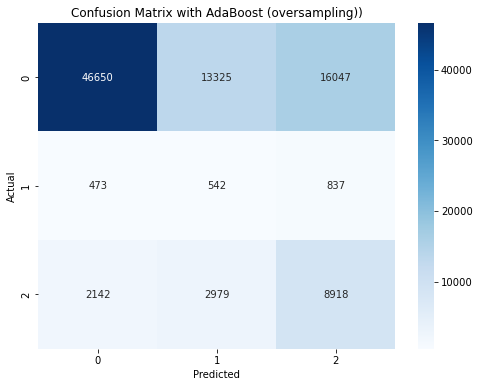

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
y_pred = clf.predict(X_scaled_test)  # Ensure you are using the test set for predictions
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn for a nicer display
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with AdaBoost (oversampling))')
plt.show()

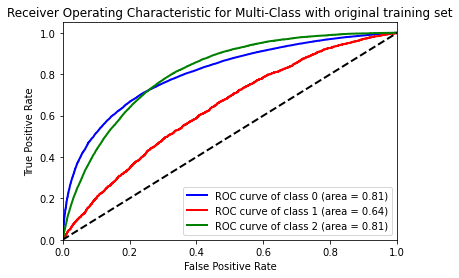

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class with original training set')
plt.legend(loc="lower right")
plt.show()